In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('C:/Users/user/Downloads/bank/bank.csv', sep=';')
df.shape

(4521, 17)

In [61]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no


In [62]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [63]:
df.isna().sum().sum()

0

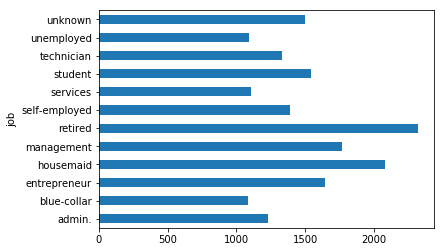

In [68]:
df.groupby('job').mean()['balance'].plot.barh() #직업별로 예금이 얼마나 있을까?

In [51]:
#df.y = df.y.map({'yes':1, 'no':0}) # 카테고리가 딱 2개일 때만 사용

In [55]:
df = pd.get_dummies(df) # 원핫 인코딩 
#x = df.drop(columns='y')
x = df.iloc[:, :-2]
y = df.y_yes

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10).fit(x,y)
model.score(x,y)

0.9046671090466711

In [26]:
x.columns[model.feature_importances_> 0.01] # 중요한 특징 

Index(['day', 'duration', 'marital_married', 'contact_cellular',
       'poutcome_success'],
      dtype='object')

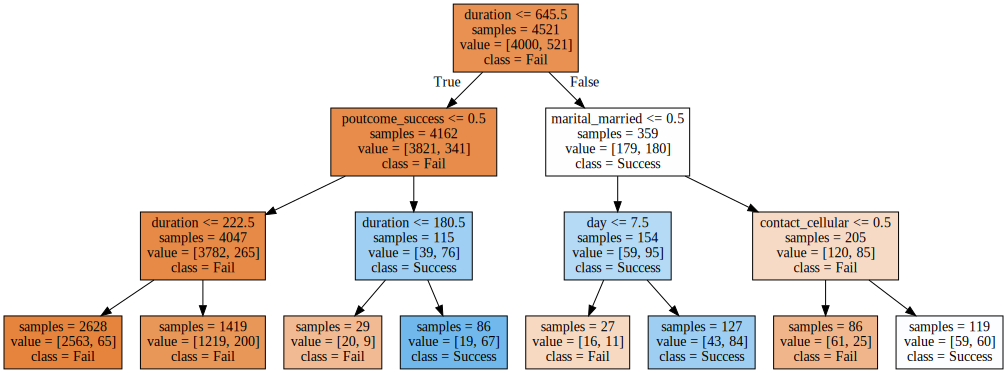

In [27]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='tree.dot', class_names=['Fail','Success'],
        feature_names=x.columns, impurity=False, filled=True)
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz #패키지 설치 anaconda prompt / pip install graphviz 
with open('tree.dot') as f:
    dot_graph = f.read()    
g = graphviz.Source(dot_graph)
display(g)